In [1]:
#Boston Housing Dataset Attribute Information (in order):
       # - CRIM     per capita crime rate by town
       # - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
       # - INDUS    proportion of non-retail business acres per town
       # - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
       # - NOX      nitric oxides concentration (parts per 10 million)
       # - RM       average number of rooms per dwelling
       # - AGE      proportion of owner-occupied units built prior to 1940
       # - DIS      weighted distances to five Boston employment centres
       # - RAD      index of accessibility to radial highways
       # - TAX      full-value property-tax rate per $10,000
       # - PTRATIO  pupil-teacher ratio by town
       # - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
       # - LSTAT    % lower status of the population
       # - MEDV     Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd #data processing  
import numpy as np #linear alg, ML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Boston Housing.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum() #null values 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

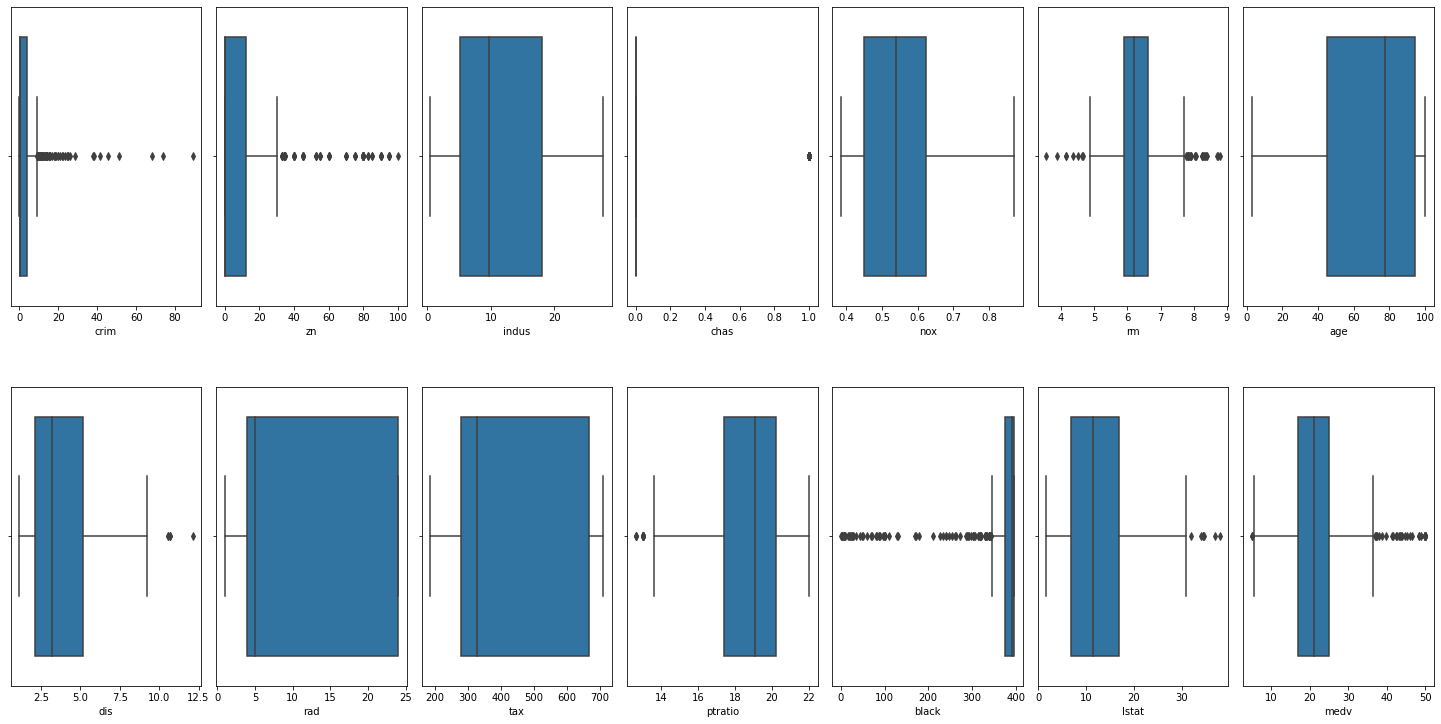

In [6]:
#box plot
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.boxplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

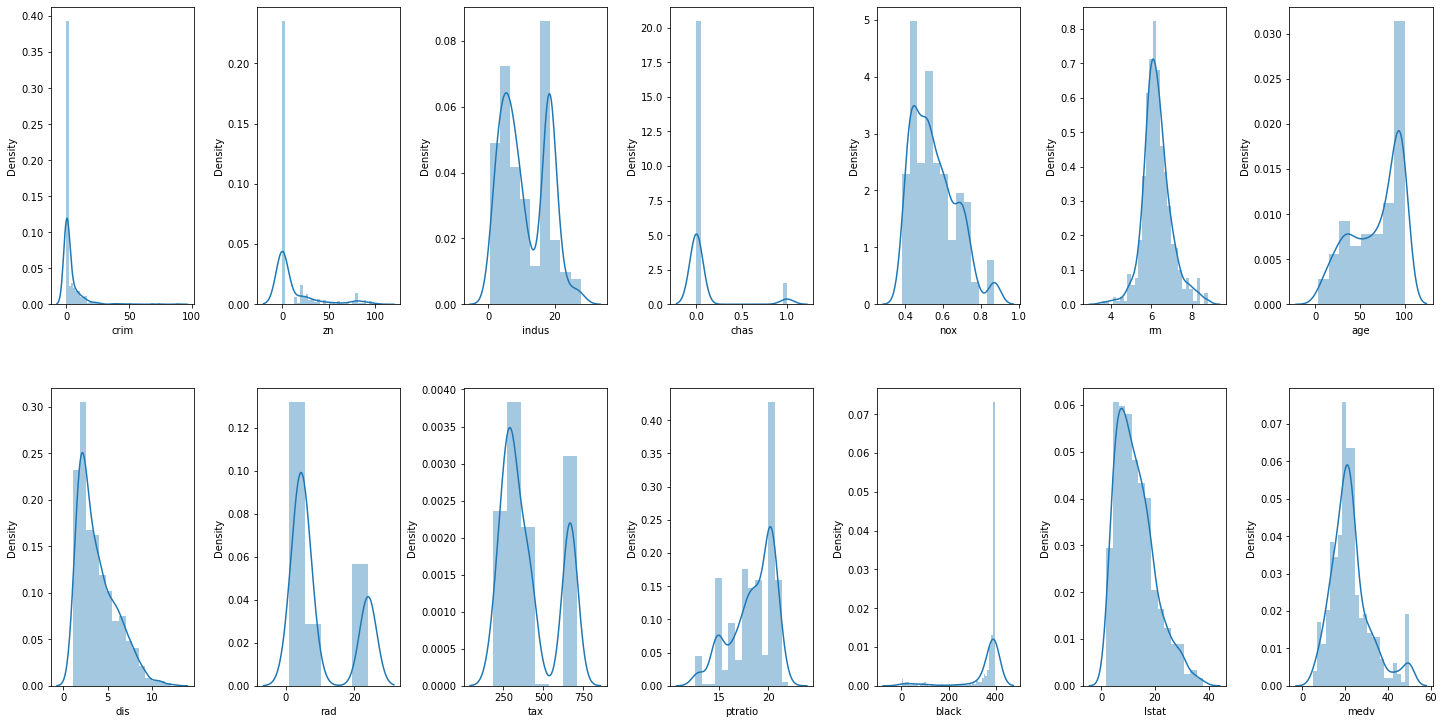

In [7]:
#dist plot
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:
cols=['indus', 'rm', 'age', 'dis']
for col in cols:
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col] - minimum)/ (maximum - minimum)

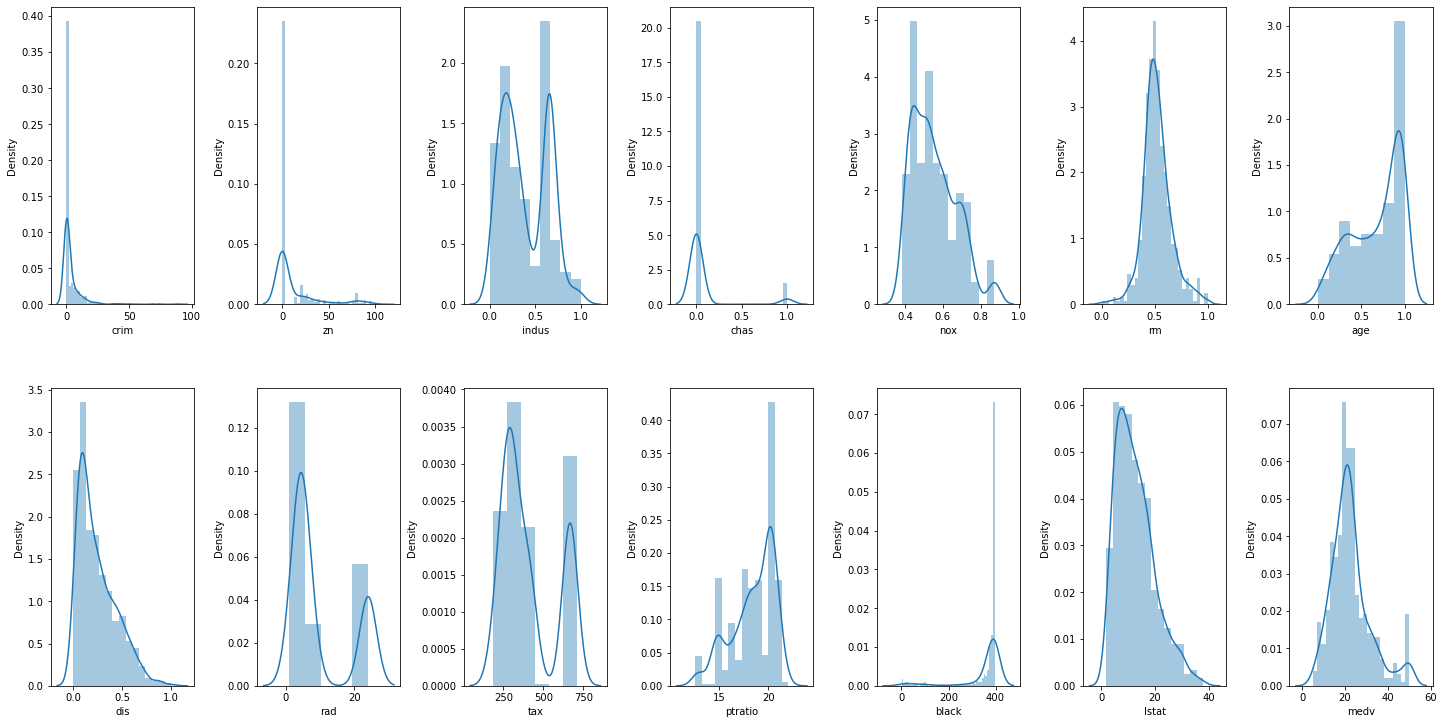

In [9]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [10]:
#standardization 
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()

#fit data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,indus,rm,age,dis
0,-1.287909,0.413672,-0.120013,0.140214
1,-0.593381,0.194274,0.367166,0.557160
2,-0.593381,1.282714,-0.265812,0.557160
3,-1.306878,1.016303,-0.809889,1.077737
4,-1.306878,1.228577,-0.511180,1.077737


In [11]:
for col in cols:
    df[col]=scaled_cols[col]

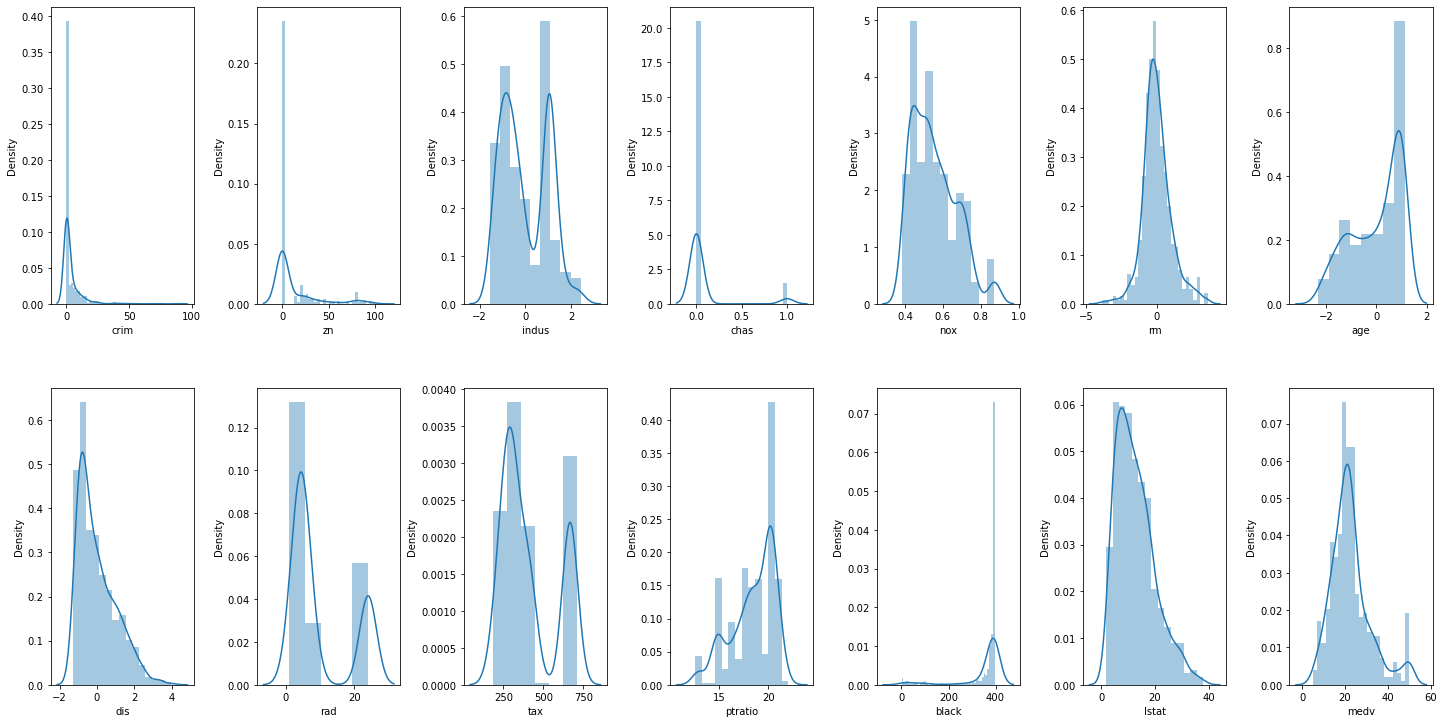

In [12]:
fig, ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

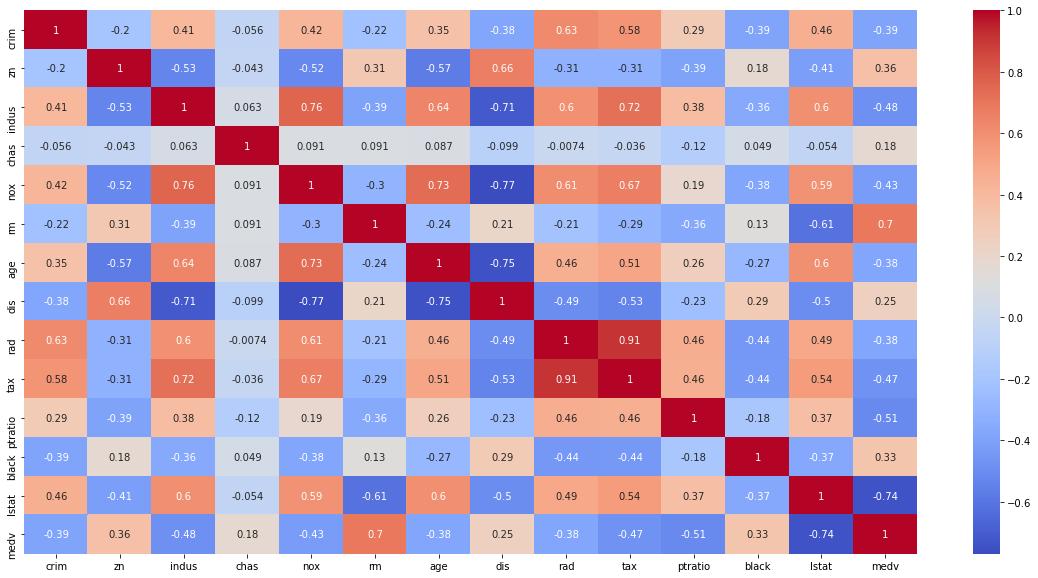

In [13]:
#correlation matrix
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

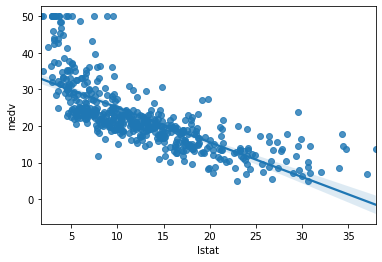

In [14]:
sns.regplot(y=df['medv'], x=df['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

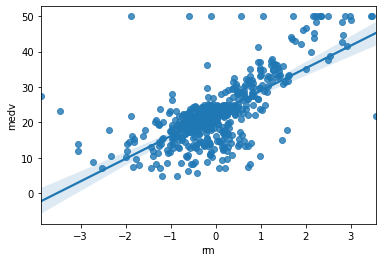

In [15]:
sns.regplot(y=df['medv'], x=df['rm'])

In [16]:
#input split
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']

In [17]:
#model training
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 23.871005067364887
CV Score: 35.581366210769204


<AxesSubplot:title={'center':'Model Coefficients'}>

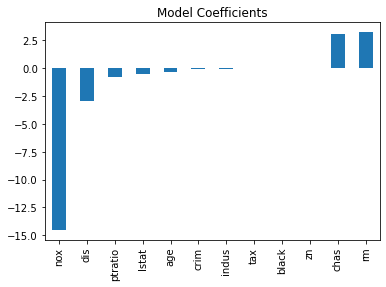

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 10.370708661417323
CV Score: 44.14882158804116


<AxesSubplot:title={'center':'Feature Importance'}>

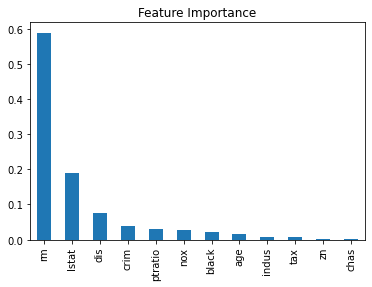

In [19]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 9.48802564566929
CV Score: 22.444169597243246


<AxesSubplot:title={'center':'Feature Importance'}>

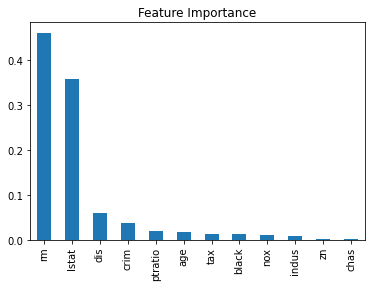

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.80198463779528
CV Score: 19.730273657367484


<AxesSubplot:title={'center':'Feature Importance'}>

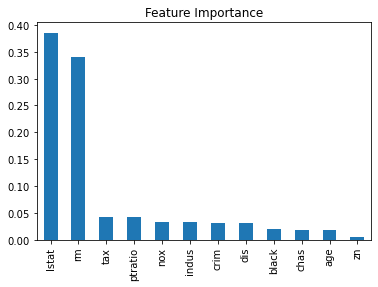

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')